In [101]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots
pyo.init_notebook_mode()
sns.set_style('darkgrid')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [102]:
import pymongo
import pandas as pd
import matplotlib.pyplot as plt
# Connexion à MongoDB
client = pymongo.MongoClient("mongodb://localhost:27017")
db = client["Spotify"]
collection = db["spotify"]

# Récupération des documents
documents = collection.find({}, {"popularity", "album", "artists.name", "audio_features", "audio_analysis"})

# Conversion des documents en une liste de dictionnaires
documents_list = list(documents)


#artist_names = []
#for doc in documents_list:
#    for artist in doc.get('artists', []): 
#        artist_names.append(artist.get('name'))

# Maintenant, 'artist_names' contient uniquement les noms des artistes.

In [103]:
# Utilisation de json_normalize pour transformer les clés en colonnes
# Cela suppose que 'audio_features' est un dictionnaire
df = pd.json_normalize(documents_list)
#ajouter la colonne artist_names
#df['artist_name'] 
df.to_csv('data.csv')
# Affichage des premières lignes du DataFrame
print(df.columns)

Index(['_id', 'popularity', 'artists', 'album.name', 'album.available_markets',
       'album.release_date', 'album.release_date_precision',
       'album.album_type', 'album.total_tracks', 'audio_features.acousticness',
       'audio_features.danceability', 'audio_features.energy',
       'audio_features.instrumentalness', 'audio_features.loudness',
       'audio_features.liveness', 'audio_features.tempo',
       'audio_features.mode', 'audio_features.speechiness',
       'audio_features.valence', 'audio_features.durations_ms',
       'audio_features.time_signature', 'audio_features.key',
       'audio_analysis.loudness', 'audio_analysis.tempo',
       'audio_analysis.tempo_confidence', 'audio_analysis.time_signature',
       'audio_analysis.time_signature_confidence', 'audio_analysis.key',
       'audio_analysis.key_confidence', 'audio_analysis.mode',
       'audio_analysis.mode_confidence'],
      dtype='object')


In [104]:
df.head(3)

_id  popularity                      artists  \
0  65a6c414ce34c168cd89e60d          90  [{'name': 'Ariana Grande'}]   
1  65a6c414ce34c168cd89e60e          97           [{'name': 'Xavi'}]   
2  65a6c414ce34c168cd89e60f         100     [{'name': 'Tate McRae'}]   

  album.name                            album.available_markets  \
0  yes, and?  [AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...   
1  La Diabla  [AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...   
2     greedy  [AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...   

  album.release_date album.release_date_precision album.album_type  \
0         2024-01-12                          day           single   
1         2023-11-30                          day           single   
2         2023-09-15                          day           single   

   album.total_tracks  audio_features.acousticness  ...  audio_features.key  \
0                   1                        0.198  ...                   1   
1                   1                        0.255  ...                  11   
2                   1                        0.256  ...                   6   

   audio_analysis.loudness  audio_analysis.tempo  \
0                      0.0                   0.0   
1                      0.0                   0.0   
2                      0.0                   0.0   

   audio_analysis.tempo_confidence  audio_analysis.time_signature  \
0                              0.0                              0   
1                              0.0                              0   
2                              0.0                              0   

   audio_analysis.time_signature_confidence  audio_analysis.key  \
0                                       0.0                   0   
1                                       0.0                   0   
2                                       0.0                   0   

   audio_analysis.key_confidence  audio_analysis.mode  \
0                            0.0                    0   
1                            0.0                    0   
2                            0.0                    0   

   audio_analysis.mode_confidence  
0                             0.0  
1                             0.0  
2                             0.0  

[3 rows x 31 columns]

In [105]:
df.tail(3)

_id  popularity  \
1798  65ab0564a9e3c02bb58d49d7          48   
1799  65ab0564a9e3c02bb58d49d8          51   
1800  65ab0564a9e3c02bb58d49d9          50   

                                        artists           album.name  \
1798      [{'name': '47ter'}, {'name': 'Tayc'}]       Au bon endroit   
1799  [{'name': 'AMARIA BB'}, {'name': 'Tayc'}]  Slow Motion (Remix)   
1800      [{'name': 'Tayc'}, {'name': 'Lynda'}]           Dis-le moi   

                                album.available_markets album.release_date  \
1798  [AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...         2023-04-14   
1799  [AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...         2021-09-15   
1800  [AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...         2022-04-15   

     album.release_date_precision album.album_type  album.total_tracks  \
1798                          day            album                  14   
1799                          day           single                   1   
1800                          day           single                   1   

      audio_features.acousticness  ...  audio_features.key  \
1798                        0.626  ...                   7   
1799                        0.283  ...                   1   
1800                        0.266  ...                   7   

      audio_analysis.loudness  audio_analysis.tempo  \
1798                      0.0                   0.0   
1799                      0.0                   0.0   
1800                      0.0                   0.0   

      audio_analysis.tempo_confidence  audio_analysis.time_signature  \
1798                              0.0                              0   
1799                              0.0                              0   
1800                              0.0                              0   

      audio_analysis.time_signature_confidence  audio_analysis.key  \
1798                                       0.0                   0   
1799                                       0.0                   0   
1800                                       0.0                   0   

      audio_analysis.key_confidence  audio_analysis.mode  \
1798                            0.0                    0   
1799                            0.0                    0   
1800                            0.0                    0   

      audio_analysis.mode_confidence  
1798                             0.0  
1799                             0.0  
1800                             0.0  

[3 rows x 31 columns]

In [106]:
df = df.iloc[:, 0:22]
df.columns

Index(['_id', 'popularity', 'artists', 'album.name', 'album.available_markets',
       'album.release_date', 'album.release_date_precision',
       'album.album_type', 'album.total_tracks', 'audio_features.acousticness',
       'audio_features.danceability', 'audio_features.energy',
       'audio_features.instrumentalness', 'audio_features.loudness',
       'audio_features.liveness', 'audio_features.tempo',
       'audio_features.mode', 'audio_features.speechiness',
       'audio_features.valence', 'audio_features.durations_ms',
       'audio_features.time_signature', 'audio_features.key'],
      dtype='object')

In [107]:
# Nous allons supprimer certaines colonnes ici 
df.drop(columns = [ 'album.name', 'album.available_markets', 'album.release_date_precision'], inplace =True)

In [108]:
df.head(3)

_id  popularity                      artists  \
0  65a6c414ce34c168cd89e60d          90  [{'name': 'Ariana Grande'}]   
1  65a6c414ce34c168cd89e60e          97           [{'name': 'Xavi'}]   
2  65a6c414ce34c168cd89e60f         100     [{'name': 'Tate McRae'}]   

  album.release_date album.album_type  album.total_tracks  \
0         2024-01-12           single                   1   
1         2023-11-30           single                   1   
2         2023-09-15           single                   1   

   audio_features.acousticness  audio_features.danceability  \
0                        0.198                        0.788   
1                        0.255                        0.751   
2                        0.256                        0.750   

   audio_features.energy  audio_features.instrumentalness  \
0                  0.758                         0.000085   
1                  0.819                         0.000000   
2                  0.733                         0.000000   

   audio_features.loudness  audio_features.liveness  audio_features.tempo  \
0                   -6.513                    0.104               119.008   
1                   -4.372                    0.236               131.842   
2                   -3.180                    0.114               111.018   

   audio_features.mode  audio_features.speechiness  audio_features.valence  \
0                    1                      0.0505                   0.823   
1                    0                      0.0409                   0.697   
2                    0                      0.0319                   0.844   

   audio_features.durations_ms  audio_features.time_signature  \
0                            0                              4   
1                            0                              3   
2                            0                              1   

   audio_features.key  
0                   1  
1                  11  
2                   6

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1801 entries, 0 to 1800
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   _id                              1801 non-null   object 
 1   popularity                       1801 non-null   int64  
 2   artists                          1801 non-null   object 
 3   album.release_date               1801 non-null   object 
 4   album.album_type                 1801 non-null   object 
 5   album.total_tracks               1801 non-null   int64  
 6   audio_features.acousticness      1801 non-null   float64
 7   audio_features.danceability      1801 non-null   float64
 8   audio_features.energy            1801 non-null   float64
 9   audio_features.instrumentalness  1801 non-null   float64
 10  audio_features.loudness          1801 non-null   float64
 11  audio_features.liveness          1801 non-null   float64
 12  audio_features.tempo

In [110]:
df.describe()

popularity  album.total_tracks  audio_features.acousticness  \
count  1801.000000         1801.000000                  1801.000000   
mean     63.804553            9.936702                     0.279915   
std      21.437522            9.375345                     0.252718   
min       0.000000            1.000000                     0.000045   
25%      57.000000            1.000000                     0.071100   
50%      68.000000           10.000000                     0.216000   
75%      77.000000           15.000000                     0.416000   
max     100.000000           60.000000                     0.996000   

       audio_features.danceability  audio_features.energy  \
count                  1801.000000            1801.000000   
mean                      0.667354               0.640675   
std                       0.147895               0.186502   
min                       0.178000               0.001520   
25%                       0.559000               0.549000   
50%                       0.683000               0.658000   
75%                       0.778000               0.770000   
max                       0.986000               0.992000   

       audio_features.instrumentalness  audio_features.loudness  \
count                      1801.000000              1801.000000   
mean                          0.045127                -7.520667   
std                           0.179032                 4.557337   
min                           0.000000               -36.937000   
25%                           0.000000                -8.393000   
50%                           0.000002                -6.625000   
75%                           0.000494                -5.141000   
max                           0.986000                -1.231000   

       audio_features.liveness  audio_features.tempo  audio_features.mode  \
count              1801.000000           1801.000000          1801.000000   
mean                  0.177127            121.373228             0.521377   
std                   0.148976             26.662734             0.499682   
min                   0.019600             51.579000             0.000000   
25%                   0.094800            101.971000             0.000000   
50%                   0.117000            120.041000             1.000000   
75%                   0.202000            138.097000             1.000000   
max                   0.970000            217.969000             1.000000   

       audio_features.speechiness  audio_features.valence  \
count                 1801.000000             1801.000000   
mean                     0.117518                0.547664   
std                      0.102880                0.225143   
min                      0.022400                0.038200   
25%                      0.043300                0.379000   
50%                      0.073200                0.554000   
75%                      0.164000                0.729000   
max                      0.706000                0.979000   

       audio_features.durations_ms  audio_features.time_signature  \
count                       1801.0                    1801.000000   
mean                           0.0                       3.958912   
std                            0.0                       0.348775   
min                            0.0                       1.000000   
25%                            0.0                       4.000000   
50%                            0.0                       4.000000   
75%                            0.0                       4.000000   
max                            0.0                       5.000000   

       audio_features.key  
count         1801.000000  
mean             5.301499  
std              3.558658  
min              0.000000  
25%              2.000000  
50%              5.000000  
75%              8.000000  
max             11.000000

On constate pas de valeurs manquantes 

In [111]:
df.drop(columns = ['audio_features.durations_ms'], inplace = True) 
df_number = df.copy()
df.head(2)
df_number.drop(columns = ['_id', 'artists', 'album.release_date', 'album.album_type'],inplace = True)

In [112]:
describe = df_number.describe()
#La disparité mesure l’équilibrage dans la répartition des données d’un dataset. Et les mesures comme le skewness nous permettront 
#mesurer cette disparite
describe.loc['skew'] = df_number.skew()
#Le Kurtosis calcule la hauteur des queues du graphe. Vistez le site ici pour plus d'explication 
# https://inside-machinelearning.com/skewness-et-kurtosis/
describe.loc['kurtosis'] = df_number.kurt()
describe.loc['median'] = df_number.median()
describe.loc['iqr'] = describe.loc['75%']-describe.loc['25%']
describe


popularity  album.total_tracks  audio_features.acousticness  \
count     1801.000000         1801.000000                  1801.000000   
mean        63.804553            9.936702                     0.279915   
std         21.437522            9.375345                     0.252718   
min          0.000000            1.000000                     0.000045   
25%         57.000000            1.000000                     0.071100   
50%         68.000000           10.000000                     0.216000   
75%         77.000000           15.000000                     0.416000   
max        100.000000           60.000000                     0.996000   
skew        -1.334096            1.330633                     1.035406   
kurtosis     1.875388            3.033206                     0.390574   
median      68.000000           10.000000                     0.216000   
iqr         20.000000           14.000000                     0.344900   

          audio_features.danceability  audio_features.energy  \
count                     1801.000000            1801.000000   
mean                         0.667354               0.640675   
std                          0.147895               0.186502   
min                          0.178000               0.001520   
25%                          0.559000               0.549000   
50%                          0.683000               0.658000   
75%                          0.778000               0.770000   
max                          0.986000               0.992000   
skew                        -0.343279              -1.037549   
kurtosis                    -0.423537               1.755975   
median                       0.683000               0.658000   
iqr                          0.219000               0.221000   

          audio_features.instrumentalness  audio_features.loudness  \
count                         1801.000000              1801.000000   
mean                             0.045127                -7.520667   
std                              0.179032                 4.557337   
min                              0.000000               -36.937000   
25%                              0.000000                -8.393000   
50%                              0.000002                -6.625000   
75%                              0.000494                -5.141000   
max                              0.986000                -1.231000   
skew                             4.365940                -3.508969   
kurtosis                        17.952076                15.753539   
median                           0.000002                -6.625000   
iqr                              0.000494                 3.252000   

          audio_features.liveness  audio_features.tempo  audio_features.mode  \
count                 1801.000000           1801.000000          1801.000000   
mean                     0.177127            121.373228             0.521377   
std                      0.148976             26.662734             0.499682   
min                      0.019600             51.579000             0.000000   
25%                      0.094800            101.971000             0.000000   
50%                      0.117000            120.041000             1.000000   
75%                      0.202000            138.097000             1.000000   
max                      0.970000            217.969000             1.000000   
skew                     2.521927              0.367022            -0.085658   
kurtosis                 7.345197              0.187512            -1.994879   
median                   0.117000            120.041000             1.000000   
iqr                      0.107200             36.126000             1.000000   

          audio_features.speechiness  audio_features.valence  \
count                    1801.000000             1801.000000   
mean                        0.117518                0.547664   
std                         0.102880                0.225143   
min    

Le Kurtosis calcule la hauteur des queues du graphe. Vistez le site ici pour plus d'explication 
 https://inside-machinelearning.com/skewness-et-kurtosis/ et pour iqr(intervalle inter quartile) : https://www.greelane.com/fr/science-technologie-math%C3%A9matiques/math/what-is-the-interquartile-range-3126245/

- On constate deja que certaines colonnes comme **audio_features.durations_ms** n'ont pas de valeurs ou toutes les valeurs sont a 0\
Nous allons supprimer cette colonne.
- On voit aussi que la colonne popularite qui doit etre predite n'est pas assez representative, c'est a dire que la moyenne se trouve **73.50** trop\
eleve. Nous allons alors donc pour les donnees puissent etre representatives chercher a l'enrichir avec des playlist pas trop populaire en bas de 50.

In [113]:
# Nombre d'artiste dans la playlist
number_of_unique_artists = len(df['artists'].value_counts().to_list())
print("Number Of Unique Artists: ",number_of_unique_artists)

Number Of Unique Artists:  1168


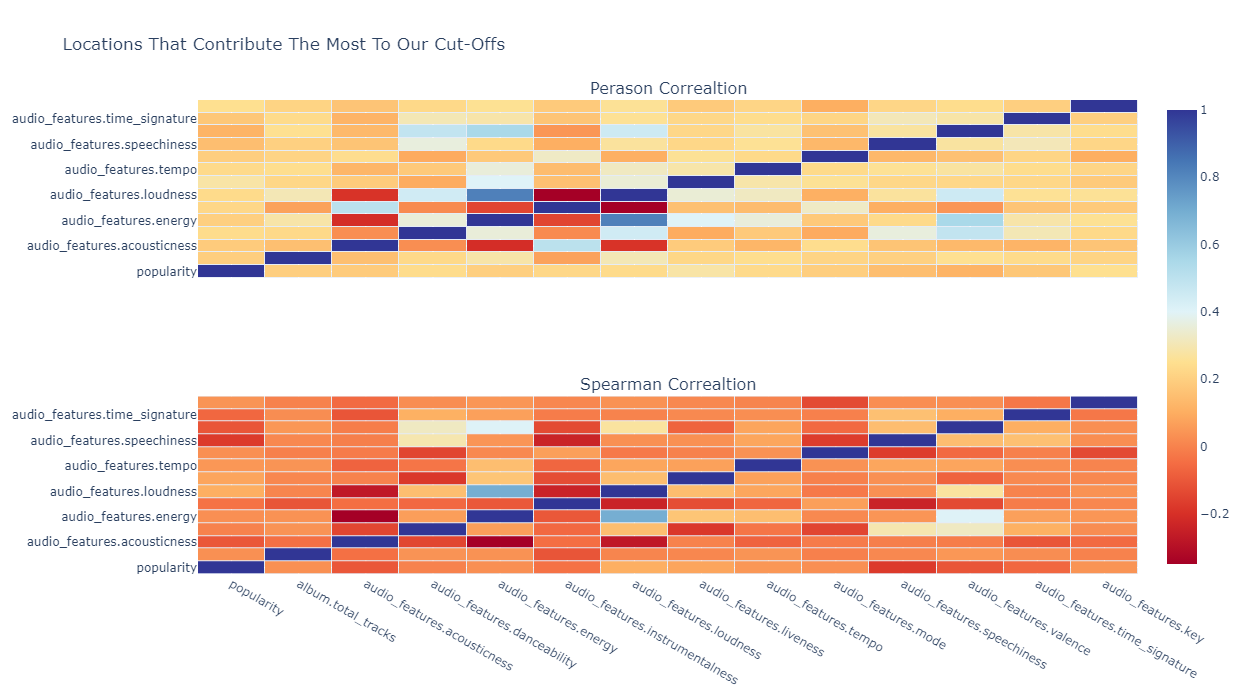

In [114]:
fig = make_subplots(rows=2, cols=1,shared_xaxes=True,subplot_titles=('Perason Correaltion',  'Spearman Correaltion'))
colorscale=[[0.0, "rgb(165,0,38)"],
                [0.1111111111111111, "rgb(215,48,39)"],
                [0.2222222222222222, "rgb(244,109,67)"],
                [0.3333333333333333, "rgb(253,174,97)"],
                [0.4444444444444444, "rgb(254,224,144)"],
                [0.5555555555555556, "rgb(224,243,248)"],
                [0.6666666666666666, "rgb(171,217,233)"],
                [0.7777777777777778, "rgb(116,173,209)"],
                [0.8888888888888888, "rgb(69,117,180)"],
                [1.0, "rgb(49,54,149)"]]

s_val =df_number.corr('pearson')
s_idx = s_val.index
s_col = s_val.columns
s_val = s_val.values
fig.add_trace(
    go.Heatmap(x=s_col,y=s_idx,z=s_val,name='pearson',showscale=False,xgap=1,ygap=1,colorscale=colorscale),
    row=1, col=1
)


s_val =df_number.corr('spearman')
s_idx = s_val.index
s_col = s_val.columns
s_val = s_val.values
fig.add_trace(
    go.Heatmap(x=s_col,y=s_idx,z=s_val,xgap=1,ygap=1,colorscale=colorscale),
    row=2, col=1
)

fig.update_layout(height=700, width=900, title_text="Locations That Contribute The Most To Our Cut-Offs")
fig.show()

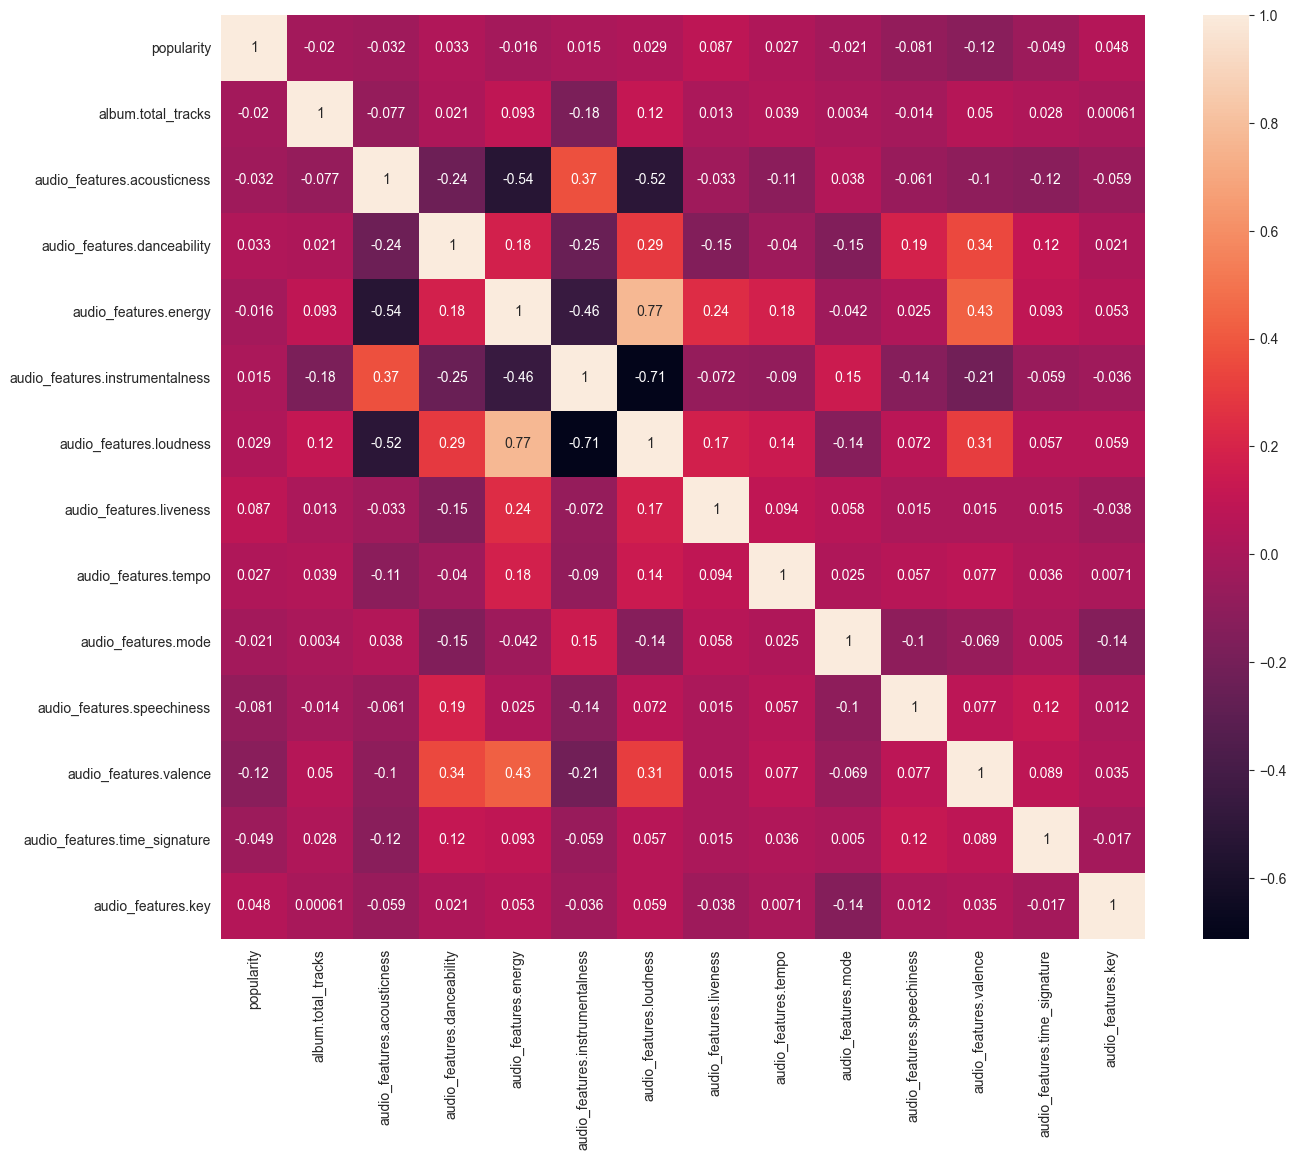

In [115]:
# visaulize the correlation matrix
cor_mat= df_number[:].corr()
fig=plt.gcf()
fig.set_size_inches(15,12)
sns.heatmap(data=cor_mat, square=True, annot=True, cbar=True)
plt.savefig('corr-matrix.png')
plt.show()

C:\Users\thibaut7\AppData\Local\Temp\ipykernel_18864\460598525.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


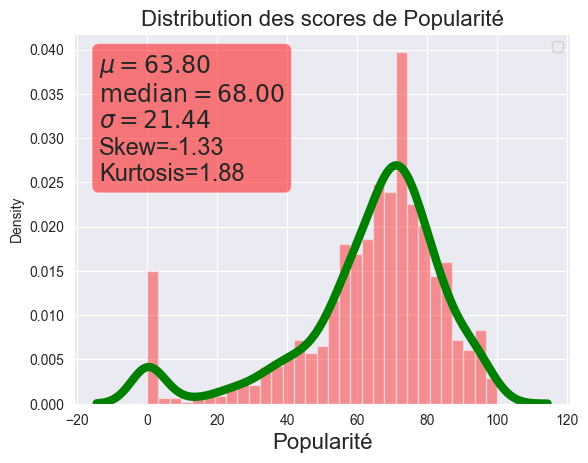

In [116]:
ax = sns.distplot(df_number['popularity'],hist_kws={'color':'r'},kde_kws={'color':'g','lw':'6'})
textstr = '\n'.join(
    
        (   r'$\mu=%.2f$' % (df_number['popularity'].mean(),)
          , r'$\mathrm{median}=%.2f$' % (df_number['popularity'].median(),)
          , r'$\sigma=%.2f$' % (df_number['popularity'].std(),)
          , r'Skew=%.2f' % (df_number['popularity'].skew(),)
          , r'Kurtosis=%.2f' % (df_number['popularity'].kurt(),)

        )
    
                  )

props = dict(boxstyle='round', facecolor='red', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=17,
        verticalalignment='top', bbox=props)
ax.set_title('Distribution des scores de Popularité',fontsize=16)
ax.set_xlabel('Popularité',fontsize=16)
plt.legend()
plt.show()

## Etude des 10 tops songs 

In [117]:
top_10_songs = df_number.sort_values(by ='popularity', ascending = False)
top_10_songs =  top_10_songs.iloc[0:9, :]
top_10_songs

popularity  album.total_tracks  audio_features.acousticness  \
1184         100                   1                       0.2560   
2            100                   1                       0.2560   
201          100                   1                       0.2560   
6             99                  18                       0.1170   
154           99                   1                       0.0026   
200           99                   1                       0.0026   
203           99                  18                       0.1170   
3             99                   1                       0.0026   
214           98                  11                       0.8680   

      audio_features.danceability  audio_features.energy  \
1184                        0.750                  0.733   
2                           0.750                  0.733   
201                         0.750                  0.733   
6                           0.552                  0.702   
154                         0.943                  0.558   
200                         0.943                  0.558   
203                         0.552                  0.702   
3                           0.943                  0.558   
214                         0.504                  0.308   

      audio_features.instrumentalness  audio_features.loudness  \
1184                         0.000000                   -3.180   
2                            0.000000                   -3.180   
201                          0.000000                   -3.180   
6                            0.000021                   -5.707   
154                          0.000002                   -4.911   
200                          0.000002                   -4.911   
203                          0.000021                   -5.707   
3                            0.000002                   -4.911   
214                          0.135000                  -14.958   

      audio_features.liveness  audio_features.tempo  audio_features.mode  \
1184                   0.1140               111.018                    0   
2                      0.1140               111.018                    0   
201                    0.1140               111.018                    0   
6                      0.1050               169.994                    1   
154                    0.0937               104.983                    1   
200                    0.0937               104.983                    1   
203                    0.1050               169.994                    1   
3                      0.0937               104.983                    1   
214                    0.1580               113.950                    1   

      audio_features.speechiness  audio_features.valence  \
1184                      0.0319                   0.844   
2                         0.0319                   0.844   
201                       0.0319                   0.844   
6                         0.1570                   0.564   
154                       0.0568                   0.606   
200                       0.0568                   0.606   
203                       0.1570                   0.564   
3                         0.0568                   0.606   
214                       0.0321                   0.121   

      audio_features.time_signature  audio_features.key  
1184                              1                   6  
2                                 1                   6  
201                               1                   6  
6                                 4                   9  
154                               4                   2  
200                               4                   2  
203                               4                   9  
3                                 4                   2  
214                               4                   9

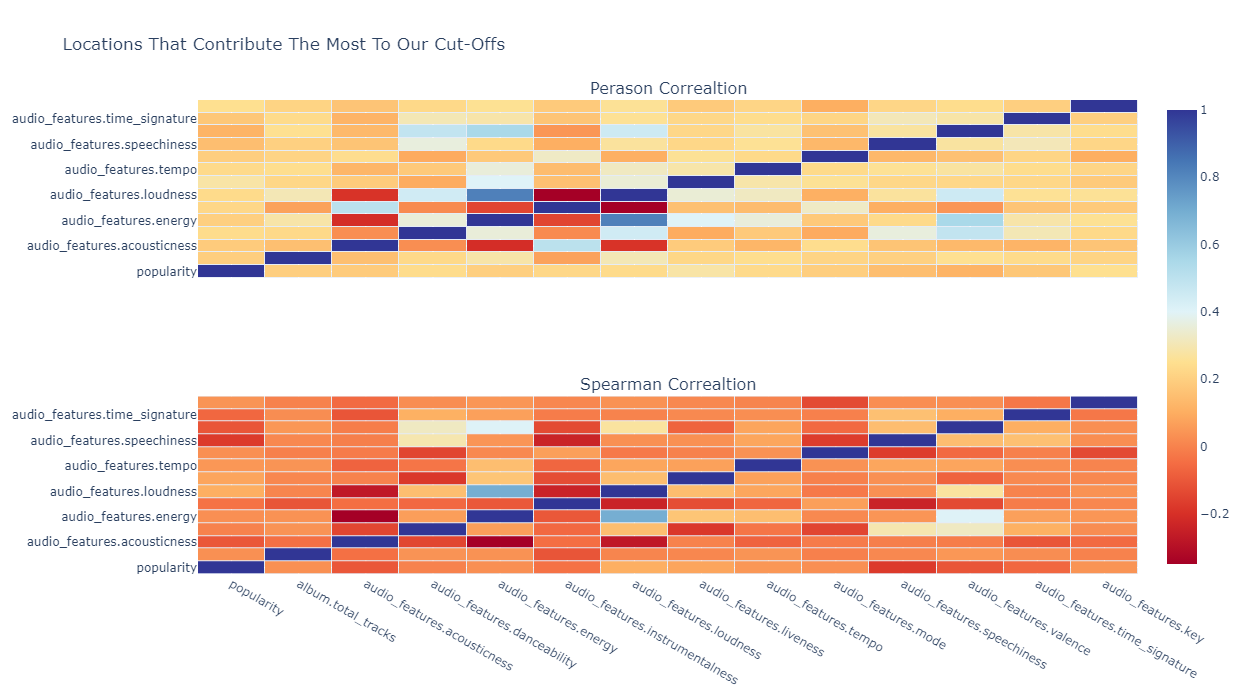

In [118]:
fig = make_subplots(rows=2, cols=1,shared_xaxes=True,subplot_titles=('Perason Correaltion',  'Spearman Correaltion'))
colorscale=[[0.0, "rgb(165,0,38)"],
                [0.1111111111111111, "rgb(215,48,39)"],
                [0.2222222222222222, "rgb(244,109,67)"],
                [0.3333333333333333, "rgb(253,174,97)"],
                [0.4444444444444444, "rgb(254,224,144)"],
                [0.5555555555555556, "rgb(224,243,248)"],
                [0.6666666666666666, "rgb(171,217,233)"],
                [0.7777777777777778, "rgb(116,173,209)"],
                [0.8888888888888888, "rgb(69,117,180)"],
                [1.0, "rgb(49,54,149)"]]

s_val =df_number.corr('pearson')
s_idx = s_val.index
s_col = s_val.columns
s_val = s_val.values
fig.add_trace(
    go.Heatmap(x=s_col,y=s_idx,z=s_val,name='pearson',showscale=False,xgap=1,ygap=1,colorscale=colorscale),
    row=1, col=1
)


s_val =df_number.corr('spearman')
s_idx = s_val.index
s_col = s_val.columns
s_val = s_val.values
fig.add_trace(
    go.Heatmap(x=s_col,y=s_idx,z=s_val,xgap=1,ygap=1,colorscale=colorscale),
    row=2, col=1
)

fig.update_layout(height=700, width=900, title_text="Locations That Contribute The Most To Our Cut-Offs")
fig.show()

C:\Users\thibaut7\AppData\Local\Temp\ipykernel_18864\2514164237.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\thibaut7\AppData\Local\Temp\ipykernel_18864\2514164237.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\thibaut7\AppData\Local\Temp\ipykernel_18864\2514164237.py:5: Us

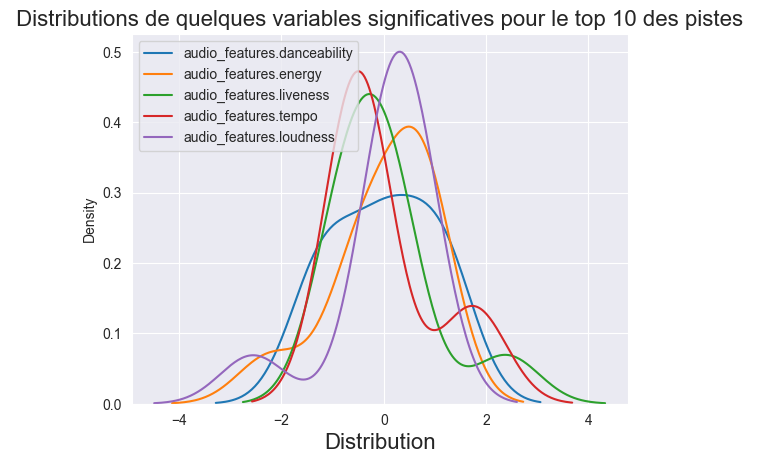

In [119]:
numeric_f = top_10_songs
cor = top_10_songs.corr()
ax = sns.distplot((top_10_songs['audio_features.danceability']-top_10_songs['audio_features.danceability'].mean())/top_10_songs['audio_features.danceability'].std(),hist=False,label='audio_features.danceability')
ax = sns.distplot((top_10_songs['audio_features.energy']-top_10_songs['audio_features.energy'].mean())/top_10_songs['audio_features.energy'].std(),hist=False,label='audio_features.energy')
ax = sns.distplot((top_10_songs['audio_features.liveness']-top_10_songs['audio_features.liveness'].mean())/top_10_songs['audio_features.liveness'].std(),hist=False,label='audio_features.liveness')
ax = sns.distplot((top_10_songs['audio_features.tempo']-top_10_songs['audio_features.tempo'].mean())/top_10_songs['audio_features.tempo'].std(),hist=False,label='audio_features.tempo')
ax = sns.distplot((top_10_songs['audio_features.loudness']-top_10_songs['audio_features.loudness'].mean())/top_10_songs['audio_features.loudness'].std(),hist=False,label='audio_features.loudness')
ax.set_xlabel('Distribution',fontsize=16)
ax.set_title(' Distributions de quelques variables significatives pour le top 10 des pistes ',fontsize=16)
plt.legend(prop={'size':'10'})
plt.show()

In [120]:
df_number.columns

Index(['popularity', 'album.total_tracks', 'audio_features.acousticness',
       'audio_features.danceability', 'audio_features.energy',
       'audio_features.instrumentalness', 'audio_features.loudness',
       'audio_features.liveness', 'audio_features.tempo',
       'audio_features.mode', 'audio_features.speechiness',
       'audio_features.valence', 'audio_features.time_signature',
       'audio_features.key'],
      dtype='object')

## MODEL SELECTION AND EVALUATION

In [121]:
y = df_number['popularity']
X = df_number[['audio_features.acousticness', 'album.total_tracks',
       'audio_features.danceability', 'audio_features.energy',
       'audio_features.instrumentalness', 'audio_features.loudness',
       'audio_features.liveness', 'audio_features.tempo',
       'audio_features.mode', 'audio_features.speechiness',
       'audio_features.valence',
       'audio_features.time_signature', 'audio_features.key']]
df_number.to_csv('d1.csv')

Nous faisons ci-dessus un pipeline de model 

In [122]:
x_test = X.iloc[0:401]
y_test = y.iloc[0:401 ]
X = X.iloc[402:]
y = y.iloc[402:]
#Knn Pipe
Knn_Pipe =  Pipeline(steps=[('scaler',StandardScaler()),('DT',KNeighborsRegressor(n_neighbors=5))])
Knn_scores = np.sqrt(-1*cross_val_score(Knn_Pipe,X,y,cv=5,scoring='neg_mean_squared_error'))
Knn_Pipe.fit(X,y)

#Random Forest Pipe
RF_Pipe =  Pipeline(steps=[('scaler',StandardScaler()),('DT',RandomForestRegressor(max_leaf_nodes=14,n_estimators=20,random_state=42))])
RF_scores = np.sqrt(-1*cross_val_score(RF_Pipe,X,y,cv=5,scoring='neg_mean_squared_error'))
RF_Pipe.fit(X,y)

#Decision Tree Pipe
DT_Pipe =  Pipeline(steps=[('scaler',StandardScaler()),('DT',DecisionTreeRegressor(max_leaf_nodes=10))])
DT_scores = np.sqrt(-1*cross_val_score(DT_Pipe,X,y,cv=5,scoring='neg_mean_squared_error'))
DT_Pipe.fit(X,y)

#Linear Regression Pipe
LR_pipe = Pipeline(steps=[('scaler',StandardScaler()),('poly',PolynomialFeatures(degree=1)),('LinearRegression',LinearRegression())])
LR_scores = np.sqrt(-1*cross_val_score(LR_pipe,X,y,cv=5,scoring='neg_mean_squared_error'))
LR_pipe.fit(X,y)

pred = LR_pipe.predict(X)
rmse = np.sqrt(mean_squared_error(pred,y))

In [123]:
print(rmse)

21.366787240586937


In [124]:
from sklearn.metrics import mean_absolute_error

# Pour KNN
Knn_pred = Knn_Pipe.predict(X)
Knn_mae = mean_absolute_error(y, Knn_pred)

# Pour Random Forest
RF_pred = RF_Pipe.predict(X)
RF_mae = mean_absolute_error(y, RF_pred)

# Pour Decision Tree
DT_pred = DT_Pipe.predict(X)
DT_mae = mean_absolute_error(y, DT_pred)

# Pour Linear Regression
LR_pred = LR_pipe.predict(X)
LR_mae = mean_absolute_error(y, LR_pred)

print("MAE for KNN:", Knn_mae)
print("MAE for Random Forest:", RF_mae)
print("MAE for Decision Tree:", DT_mae)
print("MAE for Linear Regression:", LR_mae)


MAE for KNN: 12.67505360972123
MAE for Random Forest: 14.132558545811246
MAE for Decision Tree: 14.8806183140389
MAE for Linear Regression: 15.761753381105674


In [125]:
from sklearn.metrics import mean_absolute_error

# Pour KNN
Knn_pred = Knn_Pipe.predict(x_test)
Knn_mae = mean_absolute_error(y_test, Knn_pred)

# Pour Random Forest
RF_pred = RF_Pipe.predict(x_test)
RF_mae = mean_absolute_error(y_test, RF_pred)

# Pour Decision Tree
DT_pred = DT_Pipe.predict(x_test)
DT_mae = mean_absolute_error(y_test, DT_pred)

# Pour Linear Regression
LR_pred = LR_pipe.predict(x_test)
LR_mae = mean_absolute_error(y_test, LR_pred)

print("MAE for KNN:", Knn_mae)
print("MAE for Random Forest:", RF_mae)
print("MAE for Decision Tree:", DT_mae)
print("MAE for Linear Regression:", LR_mae)


MAE for KNN: 17.74064837905237
MAE for Random Forest: 16.774511864918644
MAE for Decision Tree: 16.621643824969794
MAE for Linear Regression: 16.742627405493227


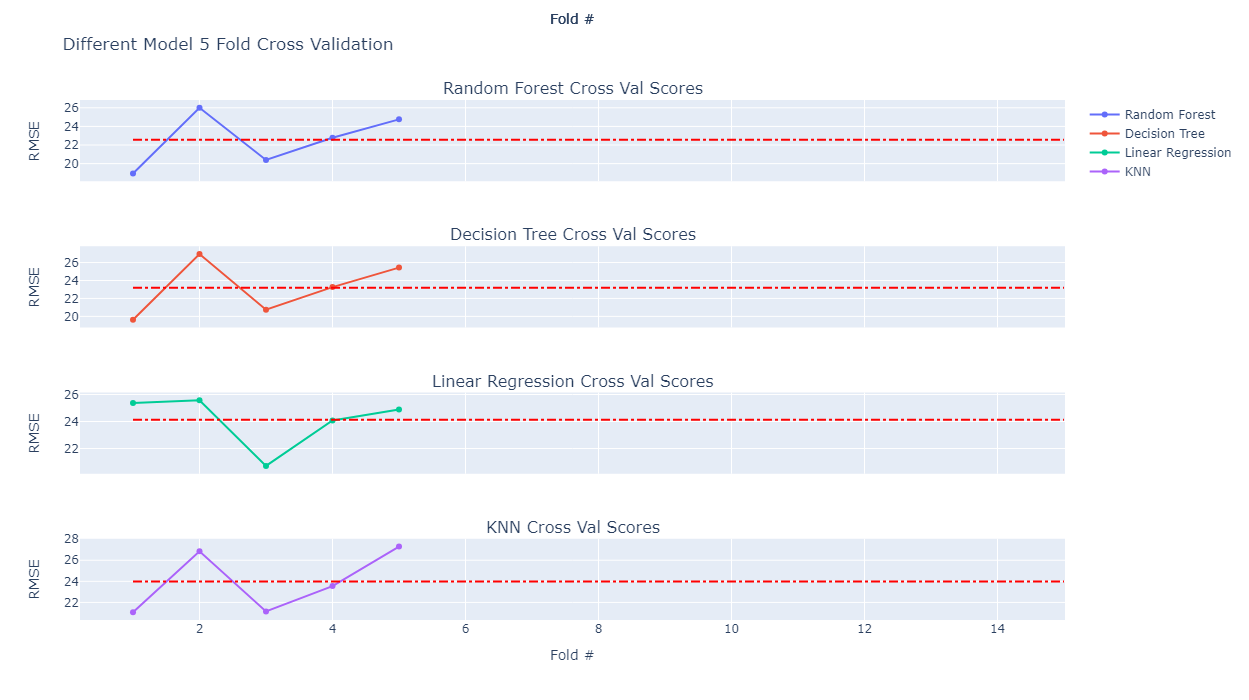

In [126]:
fig = make_subplots(rows=4, cols=1,shared_xaxes=True,subplot_titles=('Random Forest Cross Val Scores',
                                                                     'Decision Tree Cross Val Scores',
                                                                    'Linear Regression Cross Val Scores',
                                                                    'KNN Cross Val Scores'))

fig.add_trace(
    go.Scatter(x = np.arange(1,len(RF_scores)+1),y=RF_scores,mode='lines+markers',name='Random Forest'),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x = np.arange(1,len(DT_scores)+1),y=DT_scores,mode='lines+markers',name='Decision Tree'),
    row=2, col=1
)
fig.add_trace(
    go.Scatter(x = np.arange(1,len(LR_scores)+1),y=LR_scores,mode='lines+markers',name='Linear Regression'),
    row=3, col=1
)
fig.add_trace(
    go.Scatter(x = np.arange(1,len(Knn_scores)+1),y=Knn_scores,mode='lines+markers',name='KNN'),
    row=4, col=1
)


#Fold Means
fig.add_shape(type="line",
    x0=1, y0=np.mean(RF_scores), x1=15, y1=np.mean(RF_scores),
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",
    ),
        name='Mean',
        xref='x1', 
        yref='y1'
)

fig.add_shape(type="line",
    x0=1, y0=np.mean(DT_scores), x1=15, y1=np.mean(DT_scores),
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",
    ),
        name='Mean',
        xref='x2', 
        yref='y2'
)

fig.add_shape(type="line",
    x0=1, y0=np.mean(LR_scores), x1=15, y1=np.mean(LR_scores),
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",
    ),
        name='Mean',
        xref='x3', 
        yref='y3'
)

fig.add_shape(type="line",
    x0=1, y0=np.mean(Knn_scores), x1=15, y1=np.mean(Knn_scores),
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",
    ),
        name='Mean',
        xref='x4', 
        yref='y4'
)


fig.update_layout(height=700, width=900, title_text="Different Model 5 Fold Cross Validation")
fig.update_yaxes(title_text="RMSE")
fig.update_xaxes(title_text="Fold #")

fig.show()

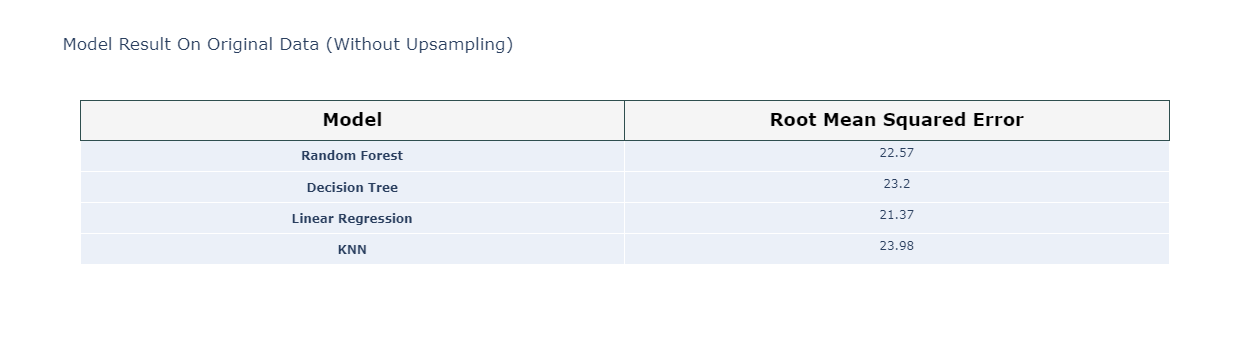

In [127]:
fig = go.Figure(data=[go.Table(header=dict(values=['<b>Model<b>', '<b>Root Mean Squared Error<b>'],
                                           line_color='darkslategray',
    fill_color='whitesmoke',
    align=['center','center'],
    font=dict(color='black', size=18),
    height=40),
                               
                 cells=dict(values=[['<b>Random Forest<b>', '<b>Decision Tree<b>','<b>Linear Regression<b>','<b>KNN<b>'],
                                    [np.round(RF_scores.mean(),2), 
                                     np.round(DT_scores.mean(),2),
                                     np.round(rmse,2),
                                     np.round(Knn_scores.mean(),2) 
                                    ]]))
                     ])

fig.update_layout(title='Model Result On Original Data (Without Upsampling)')
fig.show()

Nous voyons que le model de la **regression lineaire** est le model le plus performant; Nous selectionnons donc ce model.
Par la suite nous allons essayer d'ameliorer ce score.

## Etude de la significativite des variables 

In [128]:
import statsmodels.api as sm

# Ajouter une colonne constante à X pour l'intercept
X_sm = sm.add_constant(X)

# Ajuster le même modèle avec statsmodels
modele_sm = sm.OLS(y, X_sm).fit()

# Afficher le résumé pour obtenir p-valeur, R², etc.
print(modele_sm.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     5.728
Date:                Sat, 03 Feb 2024   Prob (F-statistic):           2.42e-10
Time:                        19:18:59   Log-Likelihood:                -6268.6
No. Observations:                1399   AIC:                         1.257e+04
Df Residuals:                    1385   BIC:                         1.264e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

Pour l'etude de la significativite des variables, nous nous referons au p-value. Les variables avec un p-value > 0.05 ne sont pas significative\
ici donc **les audio_features.acousticness, audio_features.energy, audio_features.instrumentalness, audio_features.loudness, audio_features.liveness, audio_features.tempo, audio_features.mode audio_features.valence, audio_features.time_signature, audio_features.key**\
Lien pour comprendre les sorties de statsmodels: https://github.com/atulpatelDS/Youtube/blob/main/Machine_Learning/Linear_Regression/Interpretaion_Model_Summary_statsmodels_Linear_Regression.ipynb

Nous allons donc retenir a la fin que 2 variables **'audio_features.danceability', 'audio_features.speechiness'**

In [129]:
X = X[['audio_features.danceability', 'audio_features.instrumentalness', 'audio_features.loudness', 'audio_features.liveness', 'audio_features.valence', 'audio_features.key']]

IndexError: list index out of range

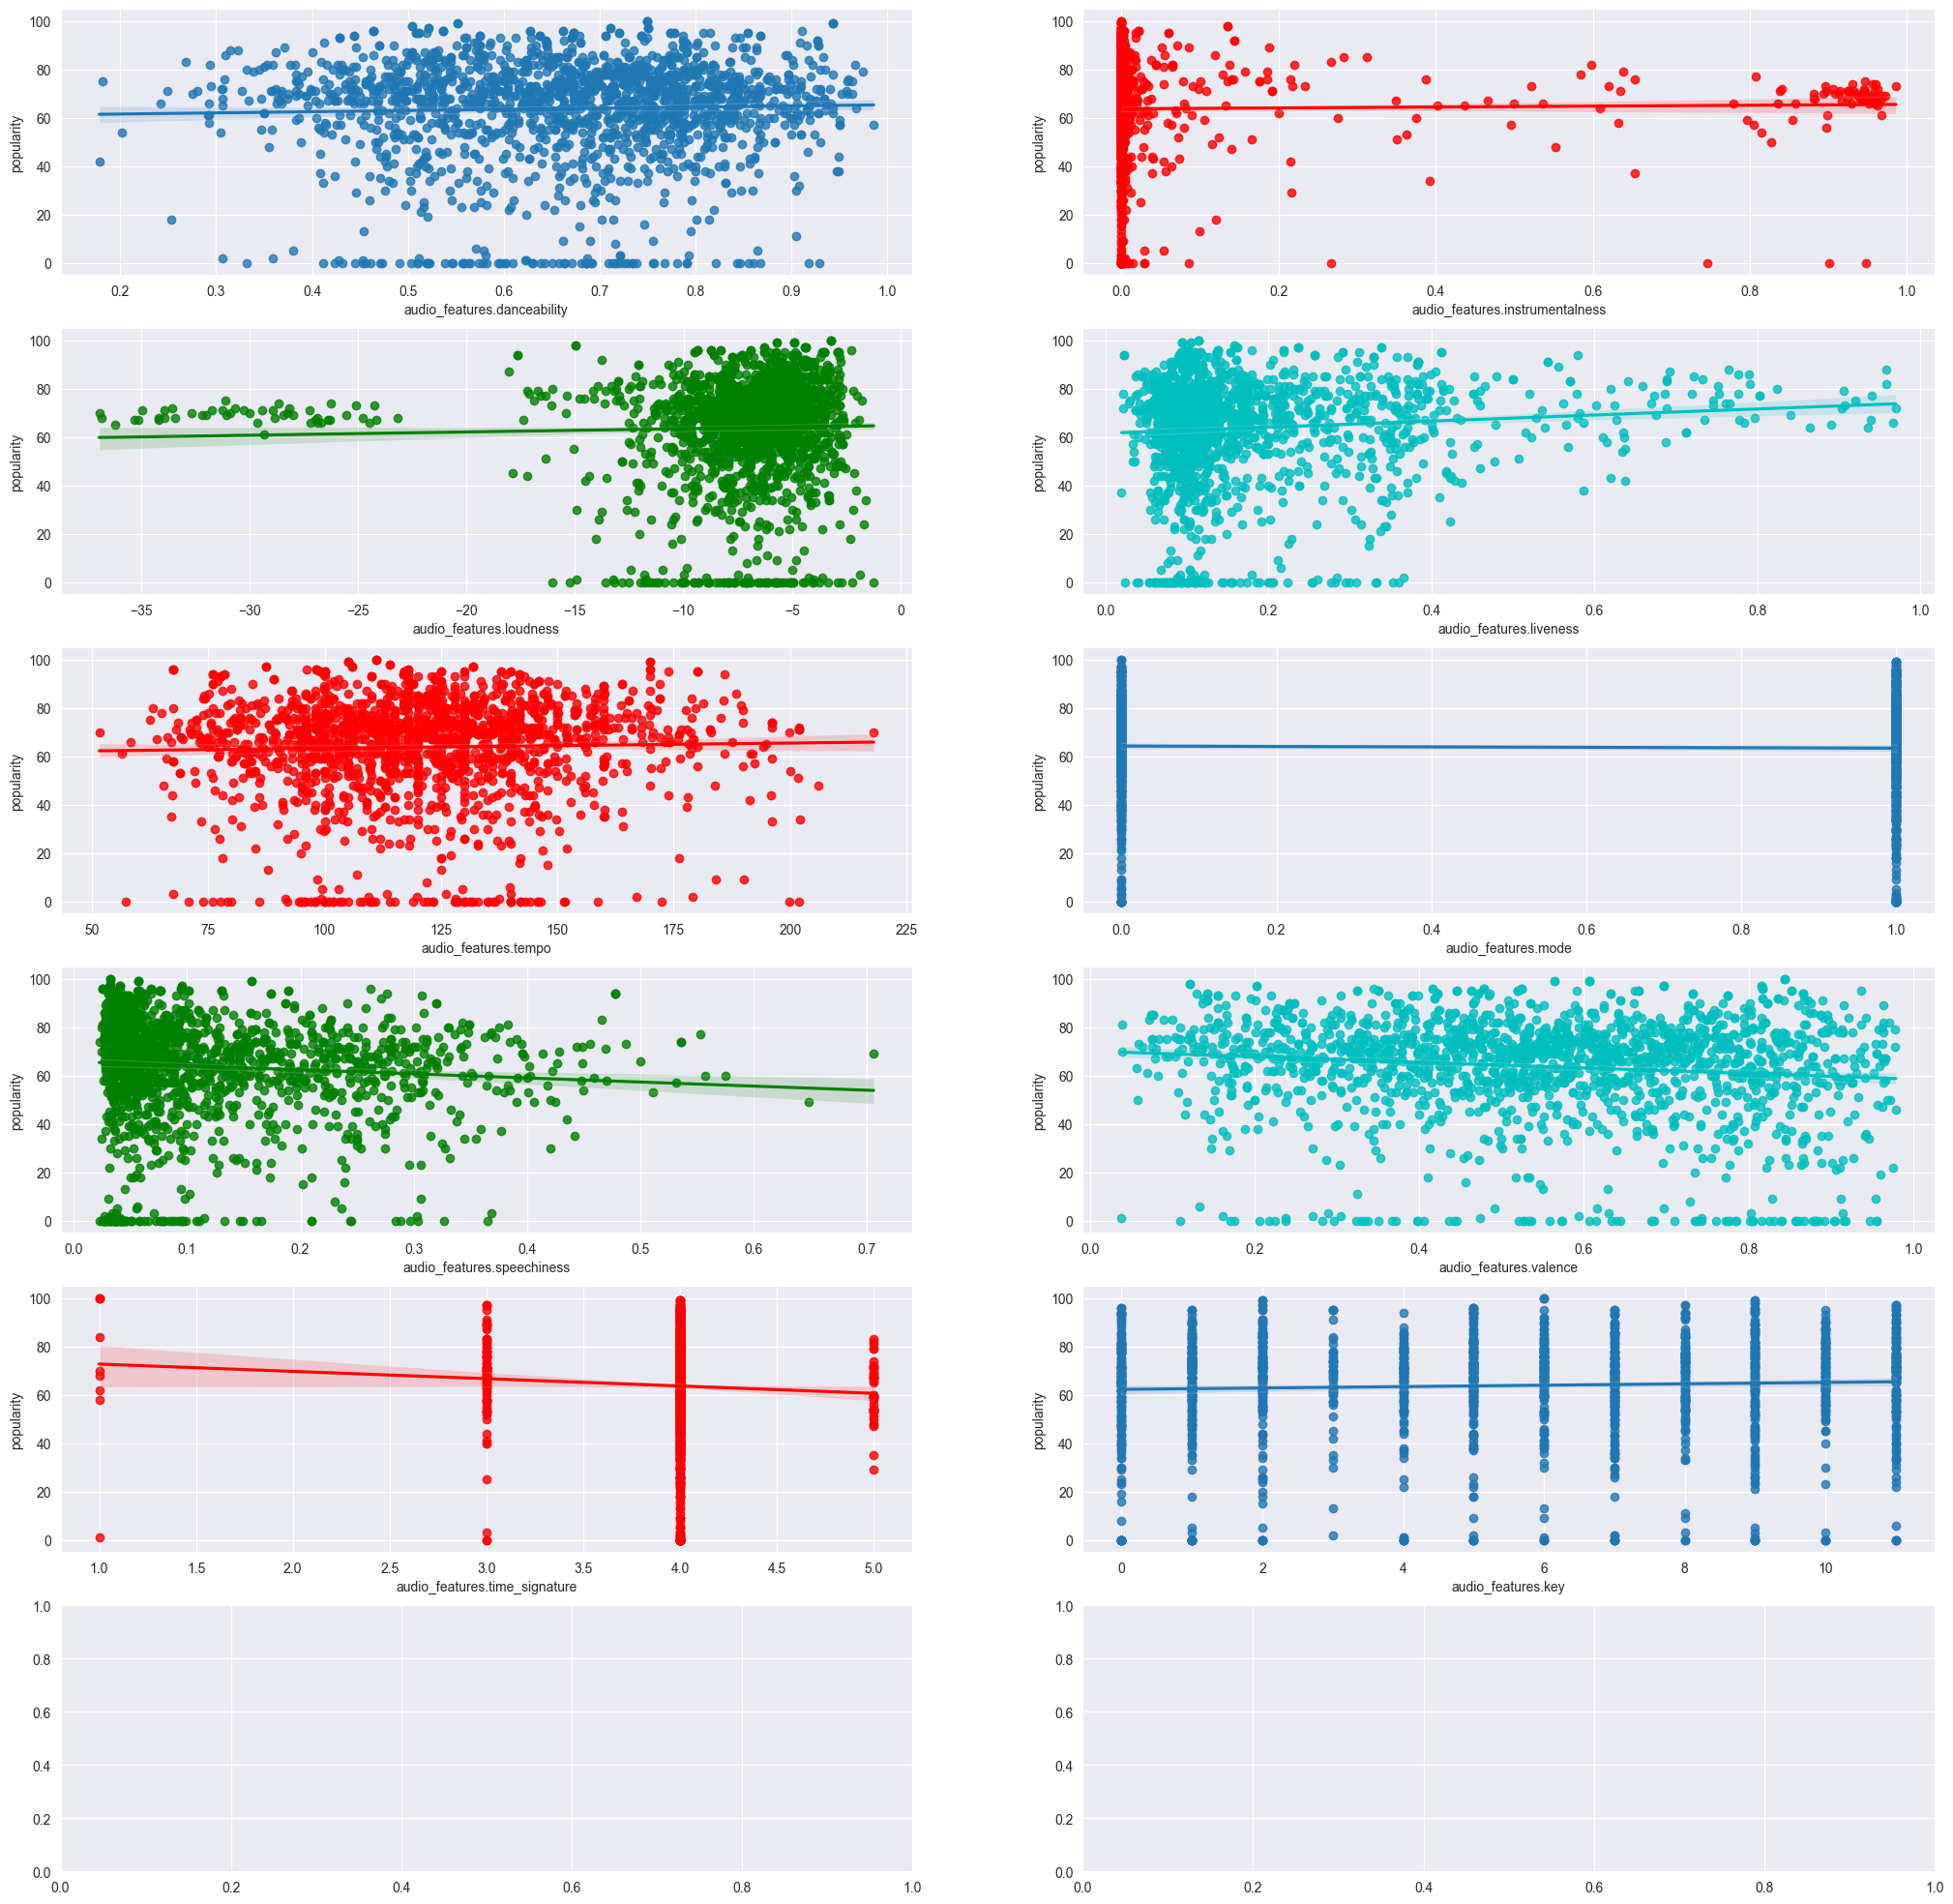

In [130]:
p_correaltion=[
       'audio_features.danceability',
       'audio_features.instrumentalness', 'audio_features.loudness',
       'audio_features.liveness', 'audio_features.tempo',
       'audio_features.mode', 'audio_features.speechiness',
       'audio_features.valence',
       'audio_features.time_signature', 'audio_features.key']
fig,axs = plt.subplots(6,2)
fig.set_figheight(25)
fig.set_figwidth(25)
sns.regplot(y=df_number['popularity'],x=df_number[p_correaltion[1]],ax=axs[0,1],color='r')
sns.regplot(y=df_number['popularity'],x=df_number[p_correaltion[0]],ax=axs[0,0])
sns.regplot(y=df_number['popularity'],x=df_number[p_correaltion[2]],ax=axs[1,0],color='g')
sns.regplot(y=df_number['popularity'],x=df_number[p_correaltion[3]],ax=axs[1,1],color='c')
sns.regplot(y=df_number['popularity'],x=df_number[p_correaltion[4]],ax=axs[2,0],color='r')
sns.regplot(y=df_number['popularity'],x=df_number[p_correaltion[5]],ax=axs[2,1])
sns.regplot(y=df_number['popularity'],x=df_number[p_correaltion[6]],ax=axs[3,0],color='g')
sns.regplot(y=df_number['popularity'],x=df_number[p_correaltion[7]],ax=axs[3,1],color='c')
sns.regplot(y=df_number['popularity'],x=df_number[p_correaltion[8]],ax=axs[4,0],color='r')
sns.regplot(y=df_number['popularity'],x=df_number[p_correaltion[9]],ax=axs[4,1])
sns.regplot(y=df_number['popularity'],x=df_number[p_correaltion[10]],ax=axs[5,0],color='g')
plt.show()

In [ ]:
X.head(2)

In [ ]:
X_sm = sm.add_constant(X)

# Ajuster le même modèle avec statsmodels
modele_sm = sm.OLS(y, X_sm).fit()

# Afficher le résumé pour obtenir p-valeur, R², etc.
print(modele_sm.summary())

In [ ]:
fig = make_subplots(rows=4, cols=1,shared_xaxes=True,subplot_titles=('Random Forest Cross Val Scores',
                                                                     'Decision Tree Cross Val Scores',
                                                                    'Linear Regression Cross Val Scores',
                                                                    'KNN Cross Val Scores'))

fig.add_trace(
    go.Scatter(x = np.arange(1,len(RF_scores)+1),y=RF_scores,mode='lines+markers',name='Random Forest'),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x = np.arange(1,len(DT_scores)+1),y=DT_scores,mode='lines+markers',name='Decision Tree'),
    row=2, col=1
)
fig.add_trace(
    go.Scatter(x = np.arange(1,len(LR_scores)+1),y=LR_scores,mode='lines+markers',name='Linear Regression'),
    row=3, col=1
)
fig.add_trace(
    go.Scatter(x = np.arange(1,len(Knn_scores)+1),y=Knn_scores,mode='lines+markers',name='KNN'),
    row=4, col=1
)


#Fold Means
fig.add_shape(type="line",
    x0=1, y0=np.mean(RF_scores), x1=15, y1=np.mean(RF_scores),
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",
    ),
        name='Mean',
        xref='x1', 
        yref='y1'
)

fig.add_shape(type="line",
    x0=1, y0=np.mean(DT_scores), x1=15, y1=np.mean(DT_scores),
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",
    ),
        name='Mean',
        xref='x2', 
        yref='y2'
)

fig.add_shape(type="line",
    x0=1, y0=np.mean(LR_scores), x1=15, y1=np.mean(LR_scores),
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",
    ),
        name='Mean',
        xref='x3', 
        yref='y3'
)

fig.add_shape(type="line",
    x0=1, y0=np.mean(Knn_scores), x1=15, y1=np.mean(Knn_scores),
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",
    ),
        name='Mean',
        xref='x4', 
        yref='y4'
)


fig.update_layout(height=700, width=900, title_text="Different Model 5 Fold Cross Validation")
fig.update_yaxes(title_text="RMSE")
fig.update_xaxes(title_text="Fold #")

fig.show()

In [ ]:
fig = go.Figure(data=[go.Table(header=dict(values=['<b>Model<b>', '<b>Root Mean Squared Error<b>'],
                                           line_color='darkslategray',
    fill_color='whitesmoke',
    align=['center','center'],
    font=dict(color='black', size=18),
    height=40),
                               
                 cells=dict(values=[['<b>Random Forest<b>', '<b>Decision Tree<b>','<b>Linear Regression<b>','<b>KNN<b>'],
                                    [np.round(RF_scores.mean(),2), 
                                     np.round(DT_scores.mean(),2),
                                     np.round(rmse,2),
                                     np.round(Knn_scores.mean(),2) 
                                    ]]))
                     ])

fig.update_layout(title='Model Result On Original Data (Without Upsampling)')
fig.show()

## Reseau de neurone 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from keras.layers import Dense
from keras.models import Sequential


# Chargement des données
data = pd.read_csv('d1.csv')

# Préparation des données
X = data.drop(['popularity', 'Unnamed: 0'], axis=1).values
y = data['popularity'].values
x_test = X[0:401, ]
y_test = y[0:401:, ]
X = X[402:,]
y = y[402:,]
# Normalisation des données
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Définition de la validation croisée K-Fold
kfold = KFold(n_splits=3, shuffle=True, random_state=42)

# Définition du modèle Keras
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_normalized.shape[1], activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))  # Couche de sortie pour la régression
    model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['mae'])
    return model

# Initialisation de la liste pour stocker les historiques de chaque pli
all_histories = []

# Boucle de validation croisée
for train, test in kfold.split(X_normalized, y):
    model = create_model()
    print(f'Training for fold {train} ...')

    # Enregistrement de l'historique de l'entraînement
    history = model.fit(X_normalized[train], y[train], epochs=500, batch_size=10, verbose=0, validation_data=(X_normalized[test], y[test]))
    all_histories.append(history.history['val_mae'])

# Calcul de la moyenne des MAE pour chaque époque
mean_mae_per_epoch = np.mean(np.array(all_histories), axis=0)

# Affichage du graphique
plt.figure(figsize=(12, 6))
plt.plot(range(1, 501), mean_mae_per_epoch)
plt.title('MAE moyenne par époque')
plt.xlabel('Epochs')
plt.ylabel('MAE moyenne')
plt.grid(True)
plt.show()


La courbe n'est pas vraiment lisible pour ce faire nous allons supprimer
les 10 points de donnees du debut et reafficher la courbe sur un echelle de mae plus bas

In [ ]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point *(1-factor))
    else:
      smoothed_points.append(point)
  return smoothed_points
smooth_mae_history = smooth_curve(mean_mae_per_epoch[10:])
plt.plot(range(1, len(smooth_mae_history)+1), smooth_mae_history)
plt.xlabel('Nombre d\'epoques')
plt.ylabel('Erreur absolue moyenne (MAE)')
plt.show()

La courbe ci-dessus nous permet de choisir le nombre d'epochs optimal pour l'entrainement de nos donnees

In [ ]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd

data = pd.read_csv('d1.csv')
# Preparing the data
X = data.drop(['popularity', 'Unnamed: 0'], axis=1).values
y = data['popularity'].values
#test data
x_test = X[0:401, ]
y_test = y[0:401:, ]
X = X[402:,]
y = y[402:,]
num_epochs = 500
all_mae_histories = []



# Normalizing the data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=3, shuffle=True, random_state=42)

mse =[]
all_scores =[]
# Keras model
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_normalized.shape[1], activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))  # Output layer for regression

    model.compile(loss='mean_squared_error', optimizer='rmsprop', metrics=['mae'])
    return model

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(X_normalized, y):
    model = create_model()

    # Generate a print
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    model.fit(X_normalized[train], y[train], epochs=100, batch_size=1, verbose=0)

    # Generate generalization metrics
    val_mse, val_mae = model.evaluate(X_normalized[test], y[test], verbose=0)
    all_scores.append(val_mae)
    mse.append(val_mse)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {val_mse:.2f}')
    print('Mean Absolue Error: ', val_mae)
    fold_no += 1
print('La moyenne des mae', np.mean(all_scores))